In [18]:
data_dir = '/mnt/c/Users/ferna/Desktop/SingleCell/data/'
# %run -i '../../utils/load_data_short.py'

# import sys
# sys.path.insert(0, '../../utils/')
import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
%run -i '../../utils/Kruskal_Wallis_test_functions.py'

import matplotlib as mpl
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
chen_autocorrelation = pd.read_csv('autocorrelation_results/chen.autocorrelation.tab', sep='\t', index_col=0)
song_autocorrelation = pd.read_csv('autocorrelation_results/song.autocorrelation.tab', sep='\t', index_col=0)
trapnell_autocorrelation = pd.read_csv('autocorrelation_results/trapnell.autocorrelation.tab', sep='\t', index_col=0)

In [3]:
chen_int_genes, chen_int_exons = spu.get_int_events(chen_PSI, chen_mrna_counts, 0.05)
chen_int_exons = [x for x in chen_int_exons if x in mrna_per_event_chen.index]
chen_filtered_lax = filter_psi(chen_PSI, chen_int_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'], 
                           chen_read_counts, mrna_min=10, reads_min=0, cell_min=0.05)

chen_filtered_lax_reads = filter_psi(chen_PSI, chen_int_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'], 
                           chen_read_counts, mrna_min=0, reads_min=10, cell_min=0.05)

song_int_genes, song_int_exons = spu.get_int_events(song_PSI, song_mrna_counts, 0.05)
song_int_exons = [x for x in song_int_exons if x in mrna_per_event_song.index]
song_filtered_lax = filter_psi(song_PSI, song_int_exons, mrna_per_event_song, song_coverage_tab['SJ_coverage'], 
                           song_read_counts, mrna_min=10, reads_min=0, cell_min=0.05)

song_filtered_lax_reads = filter_psi(song_PSI, song_int_exons, mrna_per_event_song, song_coverage_tab['SJ_coverage'], 
                           song_read_counts, mrna_min=0, reads_min=10, cell_min=0.05)

trapnell_int_genes, trapnell_int_exons = spu.get_int_events(trapnell_PSI, trapnell_mrna_counts, 0.05)
trapnell_int_exons = [x for x in trapnell_int_exons if x in mrna_per_event_trapnell.index]
trapnell_filtered_lax = filter_psi(trapnell_PSI, trapnell_int_exons, mrna_per_event_trapnell, trapnell_coverage_tab['SJ_coverage'], 
                           trapnell_read_counts, mrna_min=10, reads_min=0, cell_min=0.05)

trapnell_filtered_lax_reads = filter_psi(trapnell_PSI, trapnell_int_exons, mrna_per_event_trapnell, trapnell_coverage_tab['SJ_coverage'], 
                           trapnell_read_counts, mrna_min=0, reads_min=10, cell_min=0.05)

lescroart_int_genes, lescroart_int_exons = spu.get_int_events(lescroart_PSI, lescroart_mrna_counts, 0.05)
lescroart_int_exons = [x for x in lescroart_int_exons if x in mrna_per_event_lescroart.index]
lescroart_filtered_lax = filter_psi(lescroart_PSI, lescroart_int_exons, mrna_per_event_lescroart, lescroart_coverage_tab['SJ_coverage'], 
                           lescroart_read_counts, mrna_min=10, reads_min=0, cell_min=0.05)

lescroart_filtered_lax_reads = filter_psi(lescroart_PSI, lescroart_int_exons, mrna_per_event_lescroart, lescroart_coverage_tab['SJ_coverage'], 
                           lescroart_read_counts, mrna_min=0, reads_min=10, cell_min=0.05)

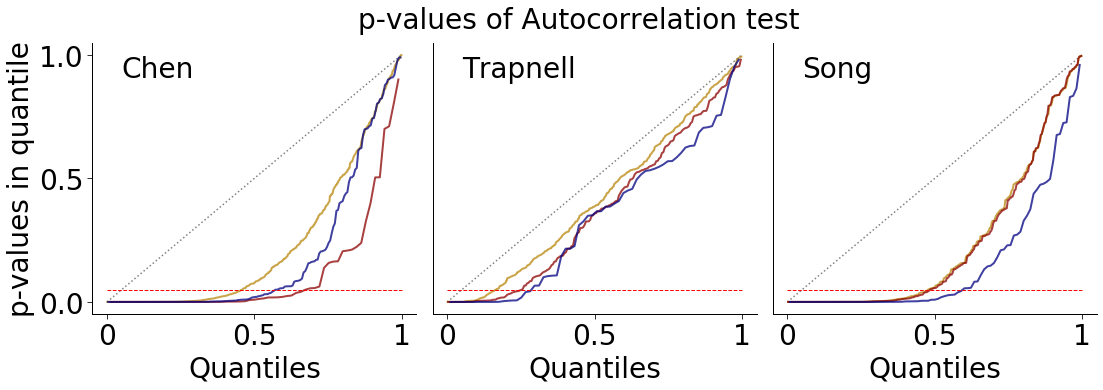

In [4]:
def plot_pvalues(ax, pval_df, filtered_PSI, rfiltered_PSI, min_obs = 0.5):
    
    selected_mrna = [x for x in filtered_PSI.index[filtered_PSI.isna().mean(axis=1) <= min_obs] if x in pval_df.index]
    selected_read = [x for x in rfiltered_PSI.index[rfiltered_PSI.isna().mean(axis=1) <= min_obs] if x in pval_df.index]

#     print('mRNA: ' + str(len(selected_mrna)))
#     print('read: ' + str(len(selected_read)))
    
    current_palette = sns.color_palette('dark')
    
    pplot_1 = probplot(pval_df.pval, dist='uniform')[0]
    pplot_2 = probplot(pval_df.loc[selected_read, 'pval'], dist='uniform')[0]
    pplot_4 = probplot(pval_df.loc[selected_mrna, 'pval'], dist='uniform')[0]
    
    ax.plot(pplot_1[0], pplot_1[1], alpha = 0.75, c=current_palette[4], label='all exons', linewidth=2)#, linestyle='--')
    ax.plot(pplot_2[0], pplot_2[1], alpha = 0.75, c='darkred', label='read filter', linewidth=2)
#     ax.plot(pplot_3[0], pplot_3[1], alpha = 0.75, c='forestgreen', label='mRNA only filter', linewidth=2)
    ax.plot(pplot_4[0], pplot_4[1], alpha = 0.75, c='navy', label='combined filter', linewidth=2)
    ax.plot([0, 1], [0.05, 0.05], 'r--', linewidth=1)
    ax.set_xlabel('Quantiles', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([0, 0.5, 1])
    ax.set_xticklabels(['0', '0.5', '1'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
    
figsize(18, 5)
fig = plt.figure()

fig.suptitle('p-values of Autocorrelation test', fontsize=28)

gs = GridSpec(1,3)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
# ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,1.05))
ax_2.set_ylim((-0.05,1.05))
ax_3.set_ylim((-0.05,1.05))


ax_1.plot([0, 1], [0, 1], c='gray', linestyle=':')
ax_2.plot([0, 1], [0, 1], c='gray', linestyle=':')
ax_3.plot([0, 1], [0, 1], c = 'gray', linestyle=':')

# ax_4.set_ylim((-0.05,1.05))

plot_pvalues(ax_1, chen_autocorrelation, chen_filtered_lax[0], chen_filtered_lax_reads[0])
# plot_pvalues(ax_2, pgamma_lescroart, lescroart_filtered_lax[0], lescroart_filtered_lax_reads[0])
plot_pvalues(ax_2, trapnell_autocorrelation, trapnell_filtered_lax[0], trapnell_filtered_lax_reads[0])
plot_pvalues(ax_3, song_autocorrelation, song_filtered_lax[0], song_filtered_lax_reads[0])

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
ax_2.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
ax_3.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('p-values in quantile', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

# plt.savefig('plots_review/figure3/autocorrelation/pvalues_3sets.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/pvalues_3sets.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/pvalues_3sets.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




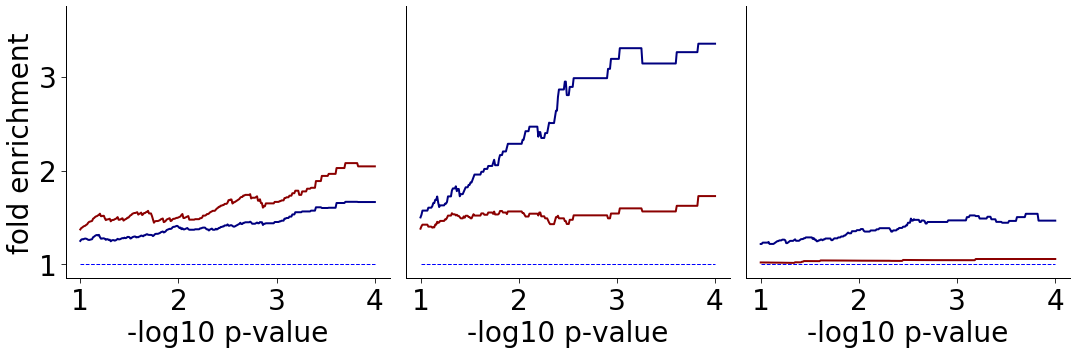

In [5]:
chen_selected_mrna = [x for x in chen_filtered_lax[0].index[chen_filtered_lax[0].isna().mean(axis=1) <= 0.5] if x in chen_autocorrelation.index]
chen_selected_read = [x for x in chen_filtered_lax_reads[0].index[chen_filtered_lax_reads[0].isna().mean(axis=1) <= 0.5] if x in chen_autocorrelation.index]
chen_data = (chen_autocorrelation, chen_selected_mrna, chen_selected_read)
trapnell_selected_mrna = [x for x in trapnell_filtered_lax[0].index[trapnell_filtered_lax[0].isna().mean(axis=1) <= 0.5] if x in trapnell_autocorrelation.index]
trapnell_selected_read = [x for x in trapnell_filtered_lax_reads[0].index[trapnell_filtered_lax_reads[0].isna().mean(axis=1) <= 0.5] if x in trapnell_autocorrelation.index]
trapnell_data = (trapnell_autocorrelation, trapnell_selected_mrna, trapnell_selected_read)
song_selected_mrna = [x for x in song_filtered_lax[0].index[song_filtered_lax[0].isna().mean(axis=1) <= 0.5] if x in song_autocorrelation.index]
song_selected_read = [x for x in song_filtered_lax_reads[0].index[song_filtered_lax_reads[0].isna().mean(axis=1) <= 0.5] if x in song_autocorrelation.index]
song_data = (song_autocorrelation, song_selected_mrna, song_selected_read)

def get_fold_enrichment(test_data, pval):
    
    pvals, selected_mrna, selected_read = test_data
    M = len(pvals)
    n = np.sum((pvals <= pval).pval)
    N_mrna = len(selected_mrna)
    k_mrna = np.sum((pvals.loc[selected_mrna] <= pval).pval)
    
    N_read = len(selected_read)
    k_read = np.sum((pvals.loc[selected_read] <= pval).pval)
    
    mrna_enrichment = (k_mrna*M)/(n*N_mrna)
    read_enrichment = (k_read*M)/(n*N_read)
    
    return read_enrichment, mrna_enrichment, M, n, N_read, k_read, N_mrna, k_mrna 


def get_enrichment(test_data):
    p_limits = 10**(-np.arange(-np.log10(0.1), -np.log10(0.0001)+0.01, 0.01))
    read_enrichment = []
#     mrna_only_enrichment = []
    mrna_enrichment = []
    
    read_pvals = []
#     mrna_only_pvals = []
    mrna_pvals = []
    
    for x in p_limits:
        enrich = get_fold_enrichment(test_data, x)
        read_enrichment.append(enrich[0])
#         mrna_only_enrichment.append(enrich[1])
        mrna_enrichment.append(enrich[1])
        
        read_pvals.append(hyper_test(enrich[2], enrich[3], enrich[4], enrich[5])[1])
#         mrna_only_pvals.append(hyper_test(enrich[3], enrich[4], enrich[7], enrich[8])[1])
        mrna_pvals.append(hyper_test(enrich[2], enrich[3], enrich[6], enrich[7])[1])
        
#     read_padj = multipletests(read_pvals, method='fdr_bh')[1]
#     mrna_only_padj = multipletests(mrna_only_pvals, method='fdr_bh')[1]
#     mrna_padj = multipletests(mrna_pvals, method='fdr_bh')[1]

#     corrected = multipletests(read_pvals + mrna_pvals, method='fdr_bh')[1]
#     read_padj = corrected[:len(p_limits)]
#     mrna_padj = corrected[len(p_limits):]
    read_padj = multipletests(read_pvals, method='fdr_bh')[1]
    mrna_padj = multipletests(mrna_pvals, method='fdr_bh')[1]


        
    return read_enrichment, mrna_enrichment, read_padj, mrna_padj



chen_enrichment = get_enrichment(chen_data)
# lescroart_enrichment = get_enrichment(lescroart_data_out)
trapnell_enrichment = get_enrichment(trapnell_data)
song_enrichment = get_enrichment(song_data)


def plot_filter_lines(ax, read, mrna):
        
    current_palette = sns.color_palette('dark')
#     10**(-np.arange(-np.log10(0.1), -np.log10(0.005)+0.001, 0.001))
    ax.plot((np.arange(-np.log10(0.1), -np.log10(0.0001)+0.01, 0.01)), read, c='darkred', 
            label='read filter', linewidth=2)
#     ax.plot((np.arange(-np.log10(0.1), -np.log10(0.00001)+0.05, 0.05)), mrna_only, c='forestgreen', 
#             label='mrna only filter', linewidth=2)
    ax.plot((np.arange(-np.log10(0.1), -np.log10(0.0001)+0.01, 0.01)), mrna, c='navy', 
            label='combined filter', linewidth=2)
    
    
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.set_xticks([1, 2, 3, 4])
    ax.set_xticklabels(['1', '2', '3', '4'])
    
    ax.tick_params(labelsize=28, length=5)
    
    
figsize(18, 5)
# figsize(18, 4)

fig = plt.figure()

# fig.suptitle('', fontsize=28)

gs = GridSpec(1,3)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
# ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((0.85,3.75))
ax_2.set_ylim((0.85,3.75))
ax_3.set_ylim((0.85,3.75))
# ax_4.set_ylim((0.85,3.25))

plot_filter_lines(ax_1, chen_enrichment[0], chen_enrichment[1])
# plot_filter_lines(ax_2, lescroart_enrichment[0], lescroart_enrichment[1], lescroart_enrichment[2])
plot_filter_lines(ax_2, trapnell_enrichment[0], trapnell_enrichment[1])
plot_filter_lines(ax_3, song_enrichment[0], song_enrichment[1])

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
# plt.setp(ax_4.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
# ax_4.yaxis.set_ticks_position('none')


# ax_1.text(0.05, 1, 'Chen', fontsize=28, verticalalignment='top')
# ax_2.text(0.05, 1, 'Lescroart', fontsize=28, verticalalignment='top')
# ax_3.text(0.05, 1, 'Trapnell', fontsize=28, verticalalignment='top')
# ax_4.text(0.05, 1, 'Song', fontsize=28, verticalalignment='top')

ax_1.plot([1, 4], [1, 1], 'b--', linewidth=1)
ax_2.plot([1, 4], [1, 1], 'b--', linewidth=1)
ax_3.plot([1, 4], [1, 1], 'b--', linewidth=1)
# ax_4.plot([1, 5], [1, 1], 'b--', linewidth=1)

# ax_3.set_xticks([0, 0.5, 1], ['0', '0.5', '1'])
            
ax_1.set_ylabel('fold enrichment', fontsize = 28)
# ax_4.legend(loc='center left', frameon=False, fontsize=14)

# plt.savefig('plots_review/figure3/autocorrelation/enrichment_3sets.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/enrichment_3sets.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/enrichment_3sets.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




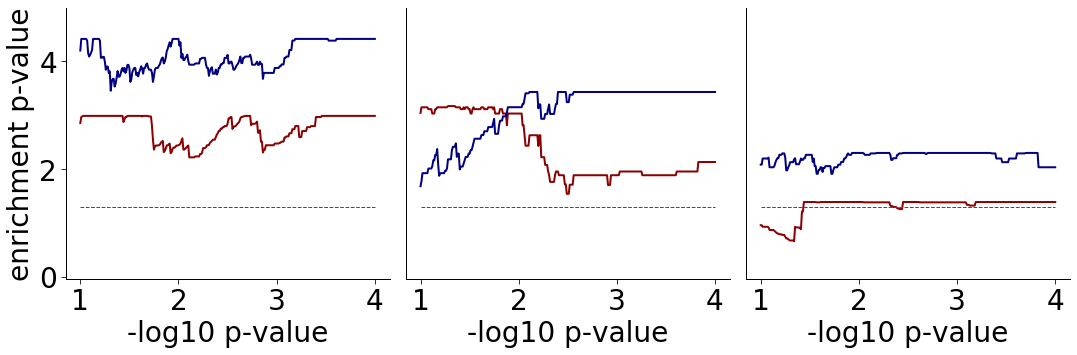

In [6]:
figsize(18, 5)
# figsize(18, 4)

fig = plt.figure()

# fig.suptitle('', fontsize=28)

gs = GridSpec(1,3)
gs.update(wspace=0.05, hspace=1.05)

ax_1 = fig.add_subplot(gs[0,0])
ax_2 = fig.add_subplot(gs[0,1])
ax_3 = fig.add_subplot(gs[0,2])
# ax_4 = fig.add_subplot(gs[0,3])

ax_1.set_ylim((-0.05,5))
ax_2.set_ylim((-0.05, 5))
ax_3.set_ylim((-0.05, 5))
# ax_4.set_ylim((-0.05,25))

plot_filter_lines(ax_1, -np.log10(chen_enrichment[2]), -np.log10(chen_enrichment[3]))
plot_filter_lines(ax_2, -np.log10(trapnell_enrichment[2]), -np.log10(trapnell_enrichment[3]))
plot_filter_lines(ax_3, -np.log10(song_enrichment[2]), -np.log10(song_enrichment[3]))

ax_1.plot([1, 4], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
ax_2.plot([1, 4], -np.log10([0.05, 0.05]), 'r--', linewidth=1)
ax_3.plot([1, 4], -np.log10([0.05, 0.05]), 'r--', linewidth=1)

plt.setp(ax_2.get_yticklabels(), visible=False)
plt.setp(ax_3.get_yticklabels(), visible=False)
ax_2.yaxis.set_ticks_position('none')
ax_3.yaxis.set_ticks_position('none')
            
ax_1.set_ylabel('enrichment p-value', fontsize = 28)

# plt.savefig('plots_review/figure3/autocorrelation/enrichment_pvals_3sets.svg', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/enrichment_pvals_3sets.pdf', bbox_inches='tight', transparent=True)
# plt.savefig('plots_review/figure3/autocorrelation/enrichment_pvals_3sets.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()




In [7]:
def plot_curves(ax, test_data, which_curve = 0, p_max = 0.1, p_min = 0.00001, steps = 0.05):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    name = names[which_curve]    
    pvals, selected_mrna, selected_read = test_data
    pvals['pvals'] = pvals.pval
    p_limits = 10**(-np.arange(-np.log10(p_max), -np.log10(p_min)+steps, steps))
#     print(len(selected_mrna))
    summary_mrna = summary_curves(pvals, selected_mrna, p_limits, 1)[which_curve]
    summary_read = summary_curves(pvals, selected_read, p_limits, 1)[which_curve]
    
    
    ax.plot(-np.log10(p_limits), summary_read, c='darkred', label='read filter', linewidth=2)
    ax.plot(-np.log10(p_limits), summary_mrna, c='navy', label='mRNA filter', linewidth=2)
    ax.set_xlabel('-log10 p-value', fontsize=28)
    ax.tick_params(labelsize=28, length=5)
    
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=28, length=5)

    
def plot_dset_curves(chen_data_out, trapnell_data_out, song_data_out, 
                     which_curve = 0, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 1)):
    
    names = ['Recall', 'Precision', 'Specificity', 'F1 score', 'Recall/Specificity', 
             'LR+', 'LR-', 'Diagnostic Odds Ratio', 'Accuracy', 'Balanced Accuracy']
    
    figsize(18, 5)
#     figsize(18, 4)
    fig = plt.figure()

    # fig.suptitle('p-values of anova test', fontsize=28)

    gs = GridSpec(1,3)
    gs.update(wspace=0.05, hspace=1.05)

    ax_1 = fig.add_subplot(gs[0,0])
    ax_2 = fig.add_subplot(gs[0,1])
    ax_3 = fig.add_subplot(gs[0,2])

    ax_1.set_ylim(ylims)
    ax_2.set_ylim(ylims)
    ax_3.set_ylim(ylims)

    plot_curves(ax_1, chen_data, which_curve, p_max, p_min, steps)
    plot_curves(ax_2, trapnell_data, which_curve, p_max, p_min, steps)
    plot_curves(ax_3, song_data, which_curve, p_max, p_min, steps)

    # plt.setp(ax_2.get_yticklabels(), visible=False)
    # plt.setp(ax_3.get_yticklabels(), visible=False)
    # plt.setp(ax_4.get_yticklabels(), visible=False)
    # ax_2.yaxis.set_ticks_position('none')
    # ax_3.yaxis.set_ticks_position('none')
    # ax_4.yaxis.set_ticks_position('none')


#     ax_1.text(2.5, 0.75, 'Chen', fontsize=28, verticalalignment='top')
#     ax_2.text(2.5, 0.75, 'Trapnell', fontsize=28, verticalalignment='top')
#     ax_3.text(2.5, 0.75, 'Song', fontsize=28, verticalalignment='top')

    xticks = range(int(-np.log10(p_max)), int(-np.log10(p_min))+1)

    ax_1.set_xticks(xticks)
    ax_1.set_xticklabels([str(i) for i in xticks])
    ax_2.set_xticks(xticks)
    ax_2.set_xticklabels([str(i) for i in xticks])
    ax_3.set_xticks(xticks)
    ax_3.set_xticklabels([str(i) for i in xticks])

    ax_1.set_ylabel(names[which_curve], fontsize = 28)

    plt.setp(ax_2.get_yticklabels(), visible=False)
    plt.setp(ax_3.get_yticklabels(), visible=False)
    ax_2.yaxis.set_ticks_position('none')
    ax_3.yaxis.set_ticks_position('none')
    
    plot_name = '_'.join(names[which_curve].split()).lower()
    
#     plt.savefig('plots_review/figure3/autocorrelation/' + plot_name + '.svg', bbox_inches='tight', transparent=True)
#     plt.savefig('plots_review/figure3/autocorrelation/' + plot_name + '.pdf', bbox_inches='tight', transparent=True)
#     plt.savefig('plots_review/figure3/autocorrelation/' + plot_name + '.png', dpi=300, bbox_inches='tight', transparent=True)

    plt.show()


In [22]:
trapnell_data[0]['pvals'] = trapnell_data[0].pval
song_data[0]['pvals'] = song_data[0].pval

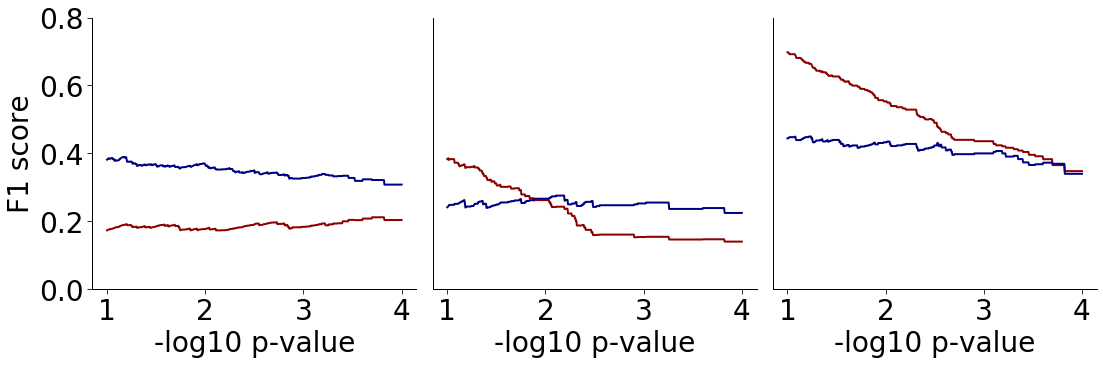

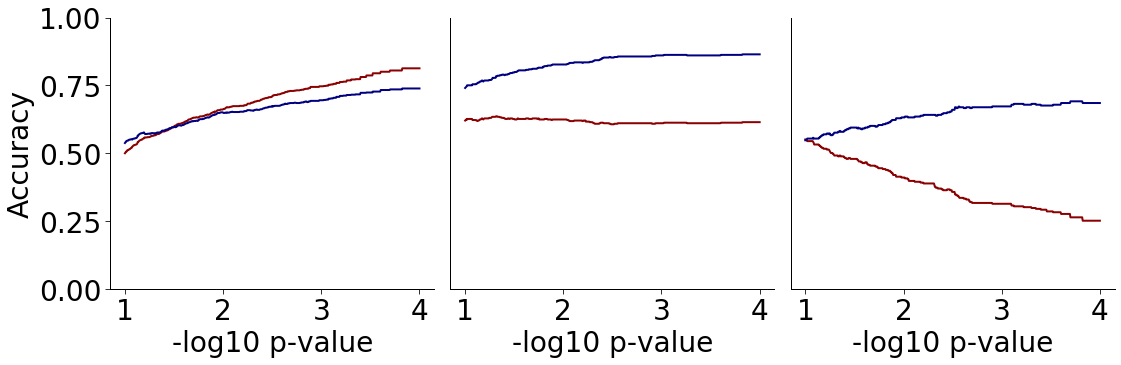

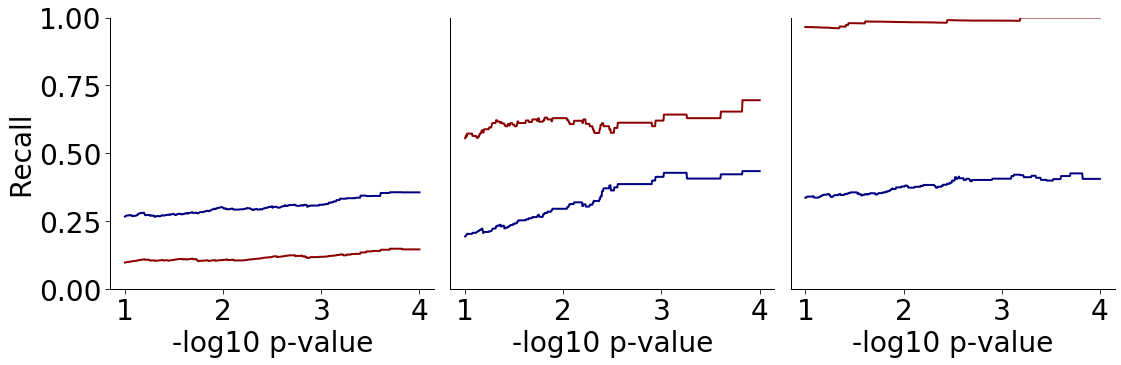

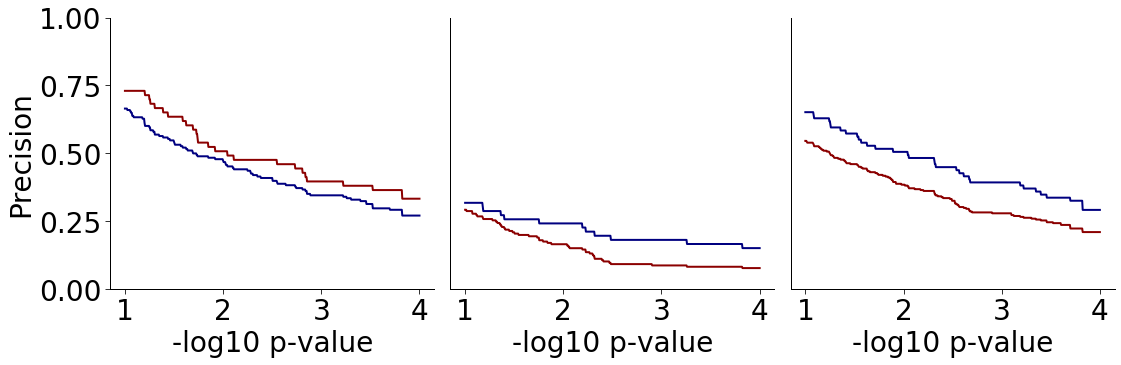

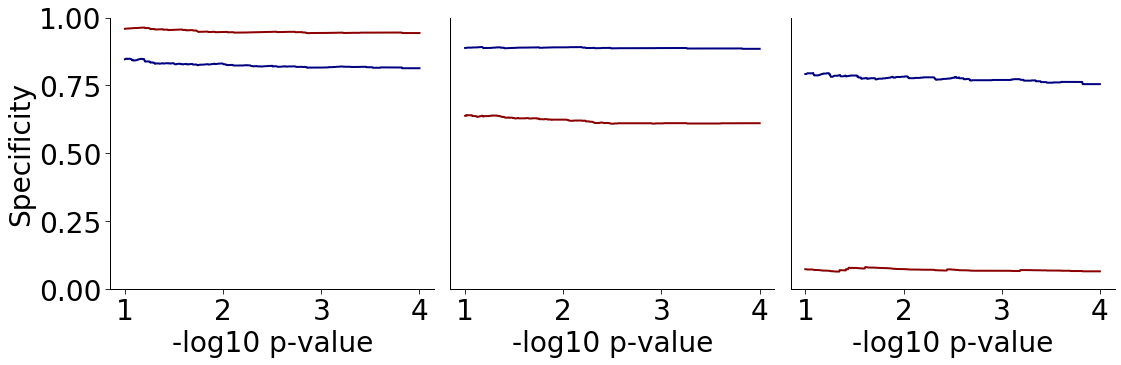

In [24]:
plot_dset_curves(chen_data, trapnell_data, song_data, 
                     which_curve = 3, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 0.8))

plot_dset_curves(chen_data, trapnell_data, song_data, 
                     which_curve = -2, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 1))

plot_dset_curves(chen_data, trapnell_data, song_data, 
                     which_curve = 0, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 1))

plot_dset_curves(chen_data, trapnell_data, song_data, 
                     which_curve = 1, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 1))

plot_dset_curves(chen_data, trapnell_data, song_data, 
                     which_curve = 2, p_max = 0.1, p_min = 0.0001, steps = 0.005, ylims=(0, 1))